# Climbing image NEB example - Lammps

In [1]:
# headers

# general modules
import numpy as np
import matplotlib.pyplot as plt

# pyiron modules
from pyiron_atomistics import Project
import pyiron_contrib

In [2]:
# define project

pr = Project('neb_example')
pr.remove_jobs_silently(recursive=True)

In [3]:
# inputs 

# structure specific
element = 'Al'
supercell = 3
vac_id_initial = 0
vac_id_final = 1
cubic = True

# job specific
potential = '2008--Mendelev-M-I--Al--LAMMPS--ipr1'

# NEB specific
n_images = 7
neb_steps = 200
gamma0 = 0.1
dynamic_gamma = True
climbing_image = True

In [4]:
# create base structure

box = pr.create.structure.bulk(name=element, cubic=cubic).repeat(supercell)

In [5]:
# template minimization job

template_job = pr.create.job.Lammps('template')
template_job.potential = potential

In [6]:
# vacancy @ atom id 0 minimization

vac_0_struct = box.copy()  # copy box
vac_0_struct.pop(vac_id_initial)  # create vacancy

vac_0 = template_job.copy_template(project=pr, new_job_name='vac_0')
vac_0.structure = vac_0_struct
vac_0.calc_minimize(pressure=0.)
vac_0.run()

# vacancy @ atom id 1 minimization

vac_1_struct = box.copy()  # copy box
vac_1_struct.pop(vac_id_final)  # create vacancy

vac_1 = template_job.copy_template(project=pr, new_job_name='vac_1')
vac_1.structure = vac_1_struct
vac_1.calc_minimize(pressure=0.)
vac_1.run()

The job vac_0 was saved and received the ID: 103


/home/raynol025/pyiron/pyiron_atomistics/pyiron_atomistics/lammps/units.py:201: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity steps. Returning un-normalized quantity
  warnings.warn(message="Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity "
/home/raynol025/pyiron/pyiron_atomistics/pyiron_atomistics/lammps/units.py:201: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity indices. Returning un-normalized quantity
  warnings.warn(message="Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity "
/home/raynol025/pyiron/pyiron_atomistics/pyiron_atomistics/lammps/units.py:201: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity velocities. Returning un-normalized quantity
  warnings.warn(message="Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity "
/home/raynol025/pyiro

The job vac_1 was saved and received the ID: 104


/home/raynol025/pyiron/pyiron_atomistics/pyiron_atomistics/lammps/units.py:201: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity indices. Returning un-normalized quantity
  warnings.warn(message="Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity "
/home/raynol025/pyiron/pyiron_atomistics/pyiron_atomistics/lammps/units.py:201: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity velocities. Returning un-normalized quantity
  warnings.warn(message="Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity "
/home/raynol025/pyiron/pyiron_atomistics/pyiron_atomistics/lammps/units.py:201: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity steps. Returning un-normalized quantity
  warnings.warn(message="Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity "


In [7]:
# create and run the NEB job

pr_neb = pr.create_group('neb')  # create a new folder

neb_ref = pr_neb.create.job.Lammps('ref_neb')
neb_ref.structure = vac_0.get_structure()
neb_ref.potential = potential
neb_ref.save()  # Don't forget this step!

neb_job = pr_neb.create.job.ProtoNEBSer('neb_job')
neb_job.input.ref_job_full_path = neb_ref.path
neb_job.input.structure_initial = vac_0.get_structure()
neb_job.input.structure_final = vac_1.get_structure()
neb_job.input.n_images = n_images
neb_job.input.n_steps = neb_steps
neb_job.input.gamma0 = gamma0
neb_job.input.use_climbing_image = climbing_image
neb_job.input.dynamic_gamma = dynamic_gamma

# # in addition to these inputs, you can also modify the following inputs
# neb_job.input.f_tol = 1e-4
# neb_job.input.spring_constant = 1.
# neb_job.input.tangent_style = "upwinding"
# neb_job.input.smoothing = None
# neb_job.input.fix_com = True
# neb_job.input.c = 0.1
# neb_job.input.tau1 = 1.
# neb_job.input.tau2 = 0.2

neb_job.run()

The job ref_neb was saved and received the ID: 105
The job neb_job was saved and received the ID: 106
The job initialize_jobs_0 was saved and received the ID: 109
The job initialize_jobs_1 was saved and received the ID: 110
The job initialize_jobs_2 was saved and received the ID: 112
The job initialize_jobs_3 was saved and received the ID: 114
The job initialize_jobs_4 was saved and received the ID: 115
The job initialize_jobs_5 was saved and received the ID: 116
The job initialize_jobs_6 was saved and received the ID: 117


/home/raynol025/pyiron/pyiron_base/pyiron_base/generic/parameters.py:282: UserWarning: The input in GenericParameters changed, while the state of the job was already finished.
  warnings.warn(


Convergence reached in 31 steps. Stopping run.


In [8]:
# load the neb job

neb_job = pr.load(neb_job.job_name)

Migration barrier: 0.6512616584242323 eV


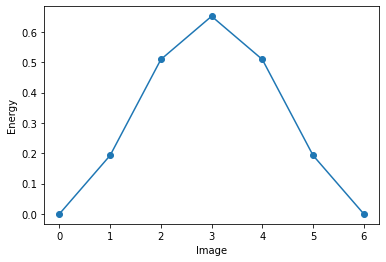

<AxesSubplot:xlabel='Image', ylabel='Energy'>

In [9]:
# get the migration barrier

print('Migration barrier: {} eV'.format(neb_job.get_barrier()))

# plot the band
neb_job.plot_elastic_band()